## Load csv data
Using inferSchema=True

In [1]:
sales = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load(path='/home/yacine/moocs/UW_ML_Case_Study/w2/home_data.csv', inferSchema=True)

In [5]:
sales.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [7]:
sales.show()

+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951

# Exploring the data for housing sales 

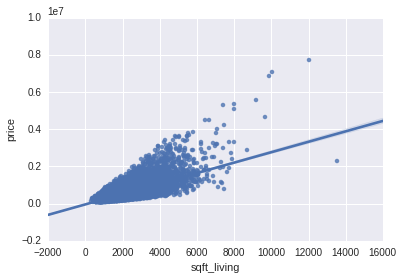

In [11]:
%matplotlib inline

import seaborn as sns

sns.regplot(x="sqft_living", y="price", data=sales.toPandas())

# Create a simple regression model of sqft_living to price

Split data into training and testing. 

In [16]:
weights = [.8, .2,]
seed = 0
train_data, test_data = sales.randomSplit(weights, seed)

In [20]:
print sales.count()
print train_data.count()
print test_data.count()

21613
17190
4423


# Selection and summary statistics

In [23]:
sales_in_county = sales.filter(sales.zipcode == 98039)
sales_in_county.map(lambda row: row.price).mean()

2160606.6000000006

#  Filtering data

In [32]:
sales_by_surface =  sales.filter((sales.sqft_living > 2000) & (sales.sqft_living <= 4000))
print float(sales_by_surface.count()) / sales.count()

0.421875722945
